In [1]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [15]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical

def load_images(folder, label_value):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Filtrar solo archivos de imagen
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
                images.append(img)
                labels.append(label_value)
            else:
                print(f"Failed to read image: {filename}")  # Verificar si la imagen se lee correctamente
        else:
            print(f"Skipped non-image file: {filename}")  # Ignorar archivos que no son imágenes
    return images, labels

# Directorios de imágenes
kevin_dir = 'C:/Users/Kevin/Pictures/Kevin_Sample'
no_kevin_dir = 'C:/Users/Kevin/Pictures/No_Kevin_Sample'

# Verificar si los directorios contienen imágenes
if not os.listdir(kevin_dir):
    print(f"No images found in {kevin_dir}")
if not os.listdir(no_kevin_dir):
    print(f"No images found in {no_kevin_dir}")

# Cargar imágenes y etiquetas con valores de etiqueta correctos
kevin_images, kevin_labels = load_images(kevin_dir, 1)  # Etiqueta 1 para Kevin
no_kevin_images, no_kevin_labels = load_images(no_kevin_dir, 0)  # Etiqueta 0 para No es Kevin

# Combinamos los arrays de las dos categorías
images = np.array(kevin_images + no_kevin_images)
labels = np.array(kevin_labels + no_kevin_labels)

# Verificar si las imágenes y etiquetas están correctas
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")

# Verificar distribución de las etiquetas
print(f"Labels distribution: {np.bincount(labels)}")

# One-hot encoding de las etiquetas
if len(labels) > 0:
    labels = to_categorical(labels)
    print(f"Labels after one-hot encoding: {labels}")
else:
    print("No labels found. Check if the directories contain images.")



Total images: 490
Total labels: 490
Labels distribution: [248 242]
Labels after one-hot encoding: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [17]:
# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 92s 7s/step - accuracy: 0.6227 - loss: 40.0128 - val_accuracy: 0.9082 - val_loss: 1.0164
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.9054 - loss: 0.5815 - val_accuracy: 0.8163 - val_loss: 0.4417
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 102s 8s/step - accuracy: 0.9030 - loss: 0.1031 - val_accuracy: 0.9592 - val_loss: 0.1604
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 101s 8s/step - accuracy: 0.9838 - loss: 0.0892 - val_accuracy: 0.9592 - val_loss: 0.1544
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.9946 - loss: 0.0546 - val_accuracy: 0.8980 - val_loss: 0.2084
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 103s 8s/step - accuracy: 0.9953 - loss: 0.0214 - val_accuracy: 0.9388 - val_loss: 0.1841
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 104s 8s/step - accuracy: 0.9948 - loss: 0.0053 - val_accuracy: 0.9388 - val_loss: 0.2582
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 103s 8s/step - accuracy: 0.9961 - loss: 0.0047 - val_accuracy: 0.9286 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
[[2.9050875e-07 9.9999976e-01]]
Kevin


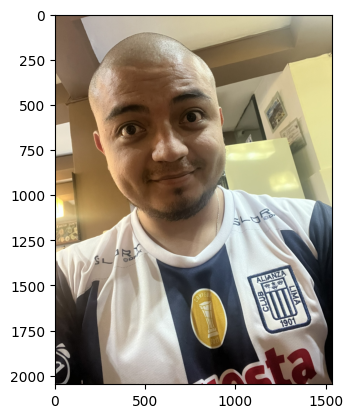

In [27]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('KevinForced.JPEG')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

# Mostramos la etiqueta de la predicción
if pred[0][0] < pred[0][1]:
    print('Kevin')
else:
    print('No es Kevin')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('KevinForced.JPEG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
[[9.9999976e-01 2.9719584e-07]]
No es Kevin


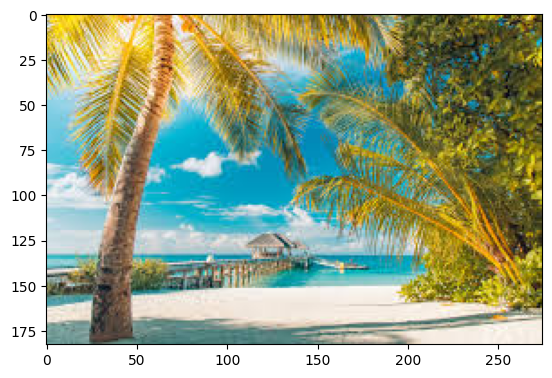

In [28]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('PlayaTest.png')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

# Mostramos la etiqueta de la predicción
if pred[0][0] < pred[0][1]:
    print('Kevin')
else:
    print('No es Kevin')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('PlayaTest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
[[0.97769016 0.02230989]]
No es Kevin


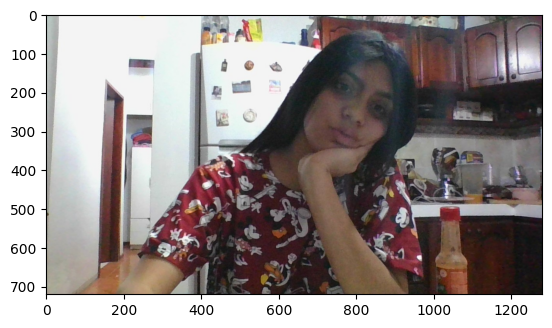

In [29]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('AmigaWebCam.jpg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

# Mostramos la etiqueta de la predicción
if pred[0][0] < pred[0][1]:
    print('Kevin')
else:
    print('No es Kevin')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('AmigaWebCam.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
[[1.5050987e-09 1.0000000e+00]]
Kevin


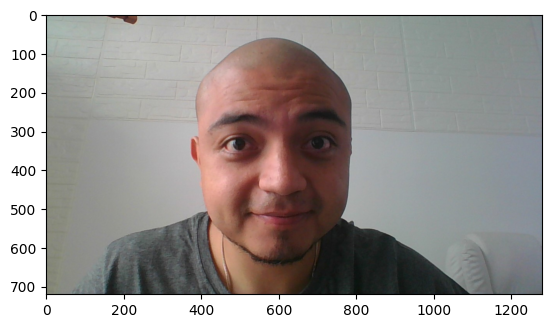

In [30]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('KevinWebCam.jpg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

# Mostramos la etiqueta de la predicción
if pred[0][0] < pred[0][1]:
    print('Kevin')
else:
    print('No es Kevin')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('KevinWebCam.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))